In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

sns.set_style()

%matplotlib inline

In [3]:
# data_frame = pd.read_csv('files/dataset.csv', parse_dates=['Data'], index_col='Data')
data_frame = pd.read_csv('files/dataset.csv')

In [4]:
data_frame.shape

(365, 2)

In [5]:
data_frame.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [6]:
data_frame.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [7]:
data_frame.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


In [8]:
data_frame.describe()

,Total_Vendas
count,365.000000
mean,59.152472
std,10.056436
min,33.265284
25%,51.496725
50%,59.165362
75%,66.610772
max,84.430251


In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [10]:
type(data_frame.Data)

pandas.core.series.Series

In [11]:
data_frame["Data"] = pd.to_datetime(data_frame["Data"])

In [12]:
temporal_series = data_frame.set_index("Data")["Total_Vendas"]
type(temporal_series)

pandas.core.series.Series

In [13]:
temporal_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [14]:
temporal_series = temporal_series.asfreq("D")
temporal_series

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

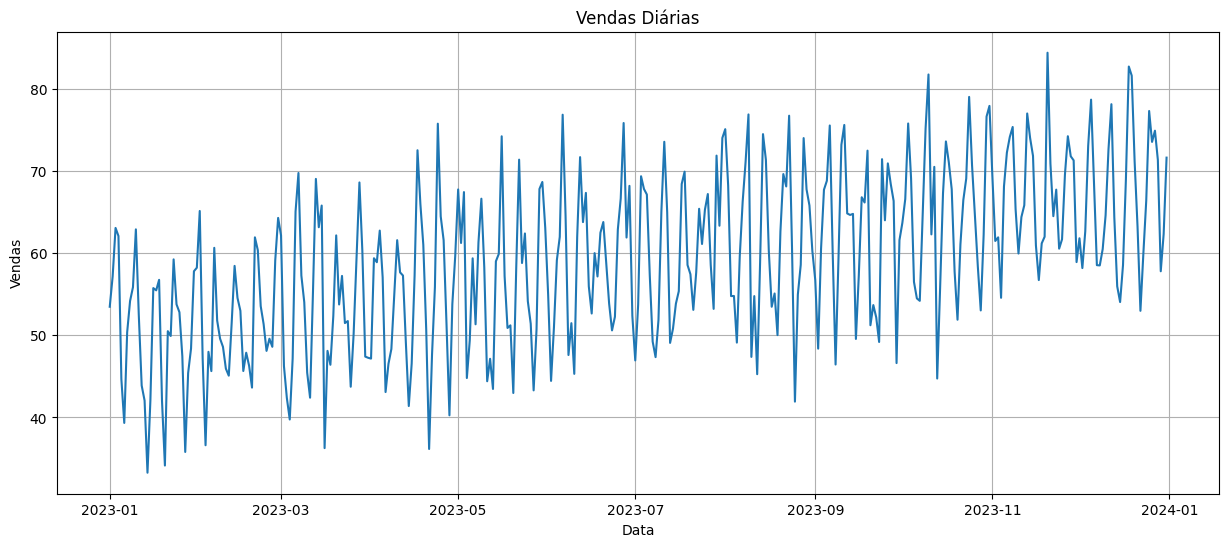

In [15]:
plt.figure(figsize=(15, 6))
plt.plot(temporal_series)
plt.title("Vendas Diárias")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.show()

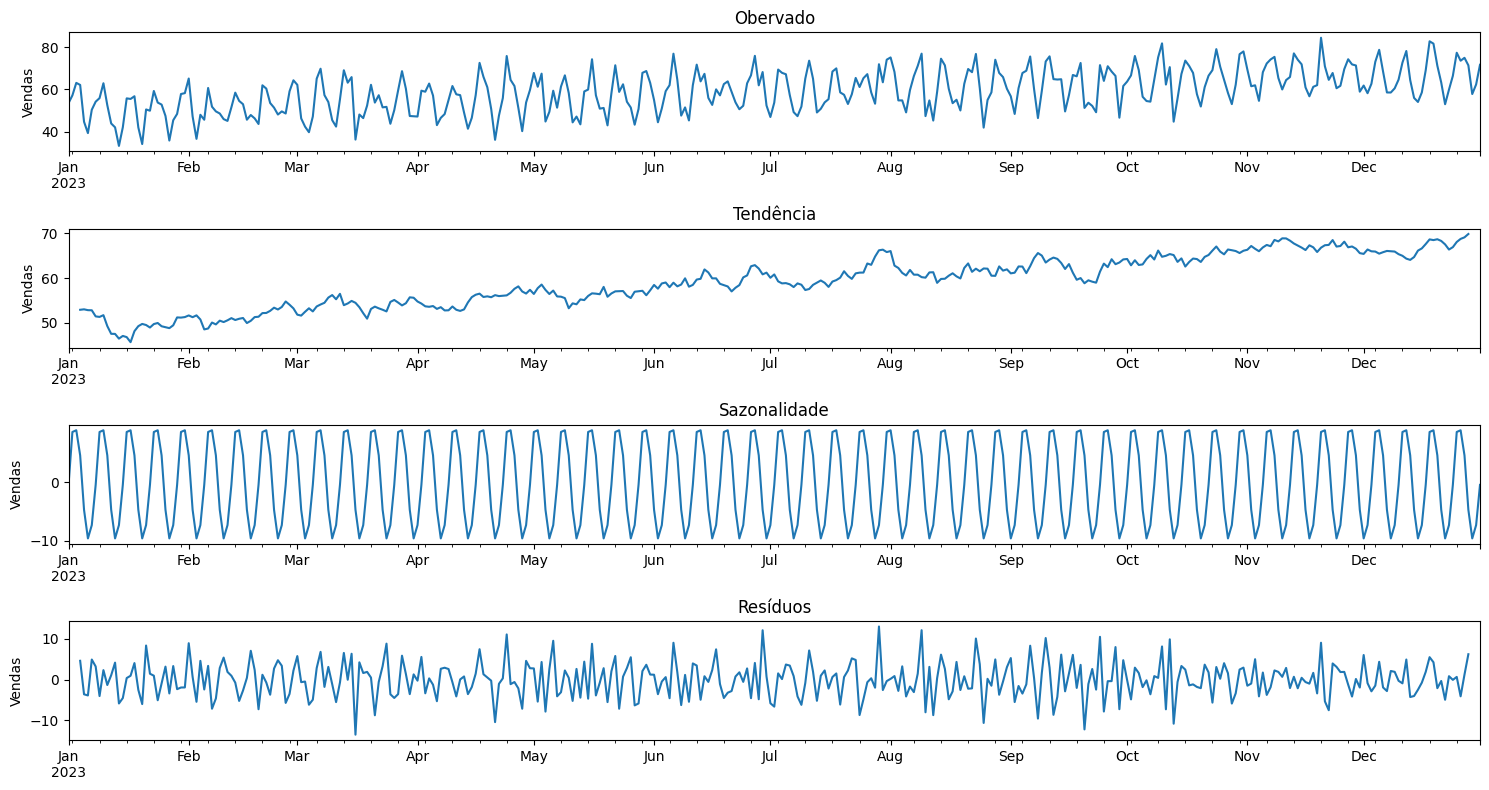

In [16]:
result = seasonal_decompose(temporal_series, model="additive")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 8))
result.observed.plot(ax=ax1, title="Obervado", xlabel="", ylabel="Vendas")
result.trend.plot(ax=ax2, title="Tendência", xlabel="", ylabel="Vendas")
result.seasonal.plot(ax=ax3, title="Sazonalidade", xlabel="", ylabel="Vendas")
result.resid.plot(ax=ax4, title="Resíduos", xlabel="", ylabel="Vendas")
plt.tight_layout()

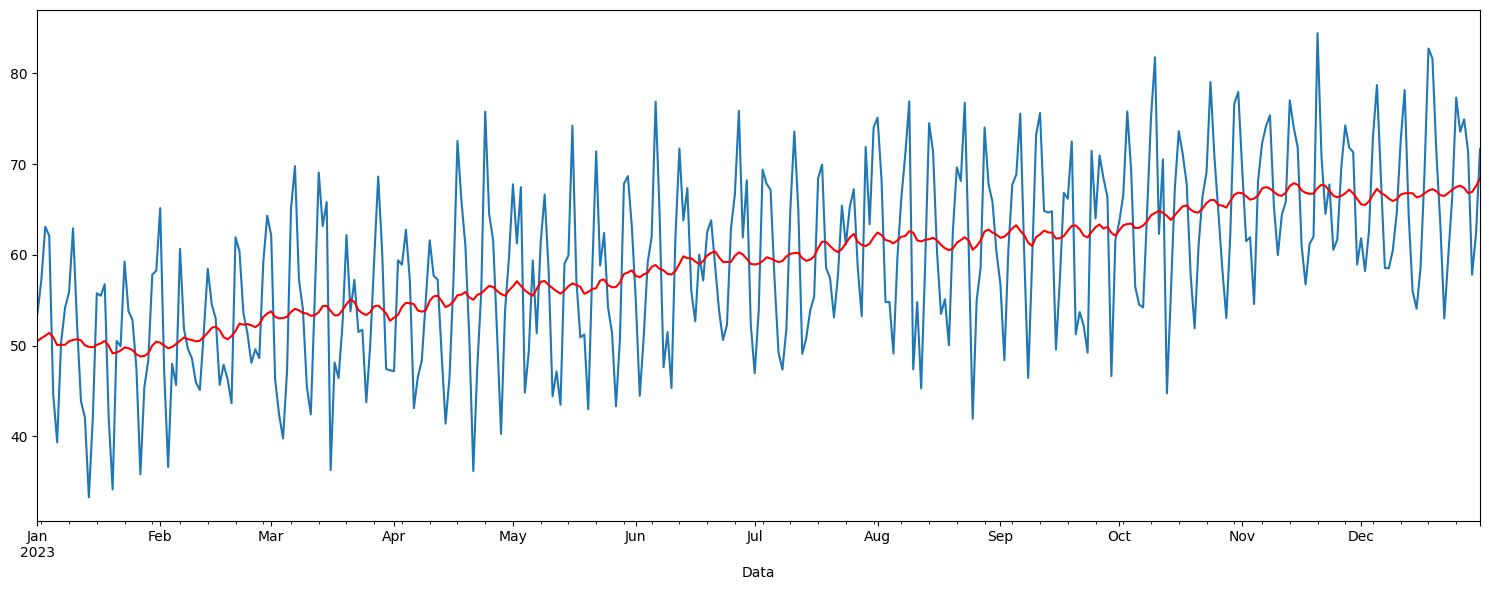

In [17]:
ma = temporal_series.rolling(window=30, min_periods=1, center=True).mean()

fig, ax = plt.subplots(figsize=(15, 6))
temporal_series.plot(ax=ax, legend=False)
ma.plot(ax=ax, color="red", legend=False)
plt.tight_layout()

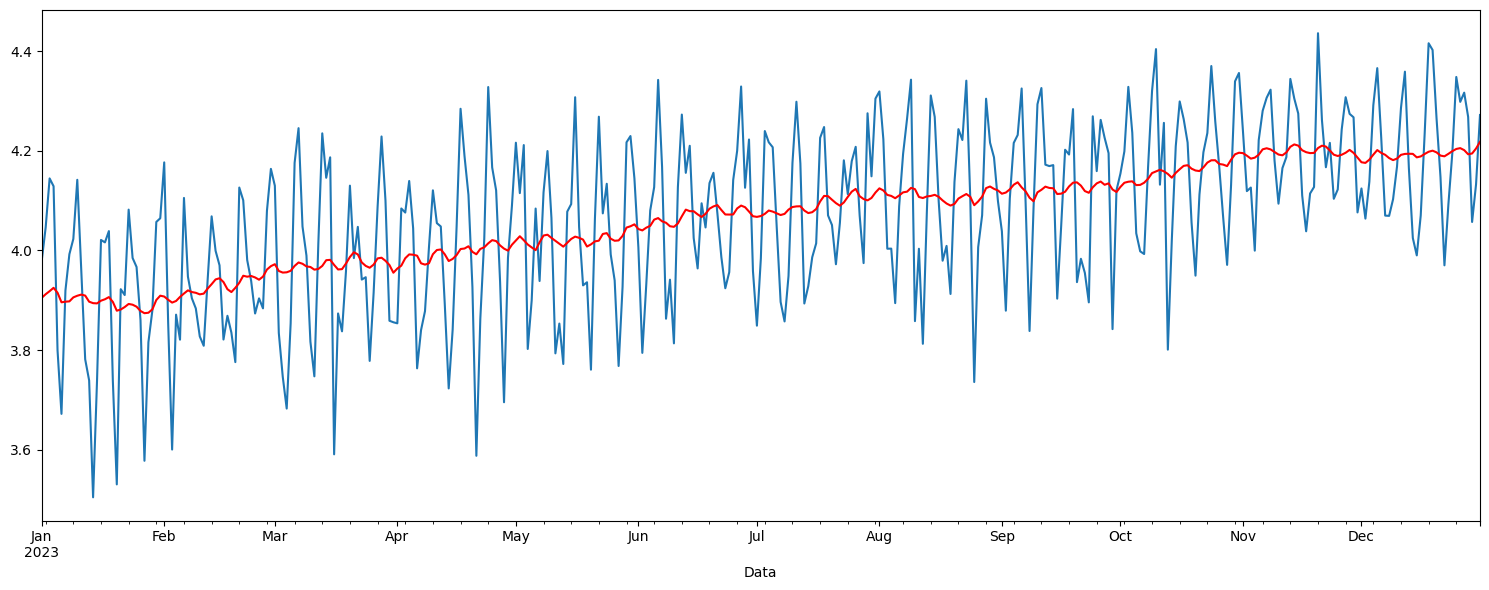

In [18]:
temporal_series_log = np.log(temporal_series)
ma_log = temporal_series_log.rolling(window=30, min_periods=1, center=True).mean()

fig, ax = plt.subplots(figsize=(15, 6))
temporal_series_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color="red", legend=False)
plt.tight_layout()

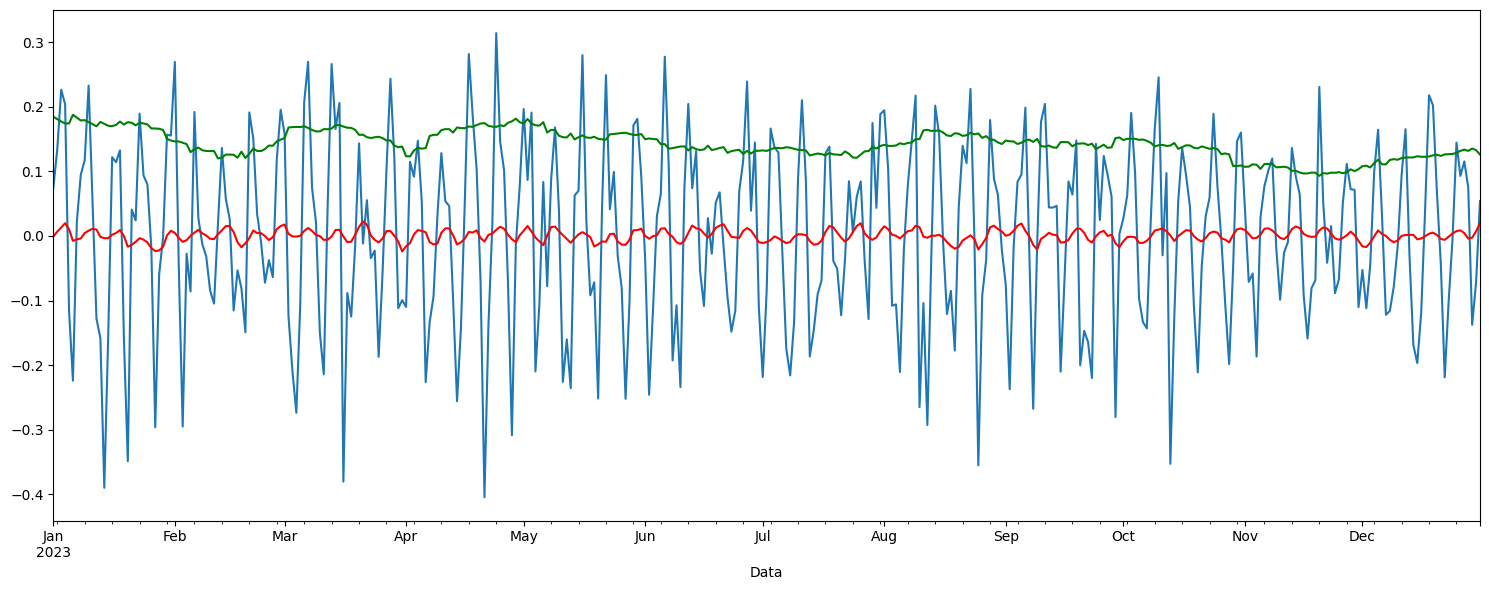

In [19]:
temporal_series_sub = (temporal_series_log - ma_log).dropna()
ma_sub = temporal_series_sub.rolling(window=30, min_periods=1, center=True).mean()
std_sub = temporal_series_sub.rolling(window=30, min_periods=1, center=True).std()

fig, ax = plt.subplots(figsize=(15, 6))
temporal_series_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color="red", legend=False)
std_sub.plot(ax=ax, color="green", legend=False)
plt.tight_layout()

In [20]:
X_sub = temporal_series_sub.values

result_sub = adfuller(X_sub)
print("Dickey-Fuller Aumentado")
print("ADF Statistic: %f" % result_sub[0])
print("p-value: %f" % result_sub[1])
print("Critical Values:")
for key, value in result_sub[4].items():
    print("\t%s: %.3f" % (key, value))

Dickey-Fuller Aumentado
ADF Statistic: -8.643192
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


Dickey-Fuller Aumentado
ADF Statistic: -9.797224
p-value: 0.000000
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


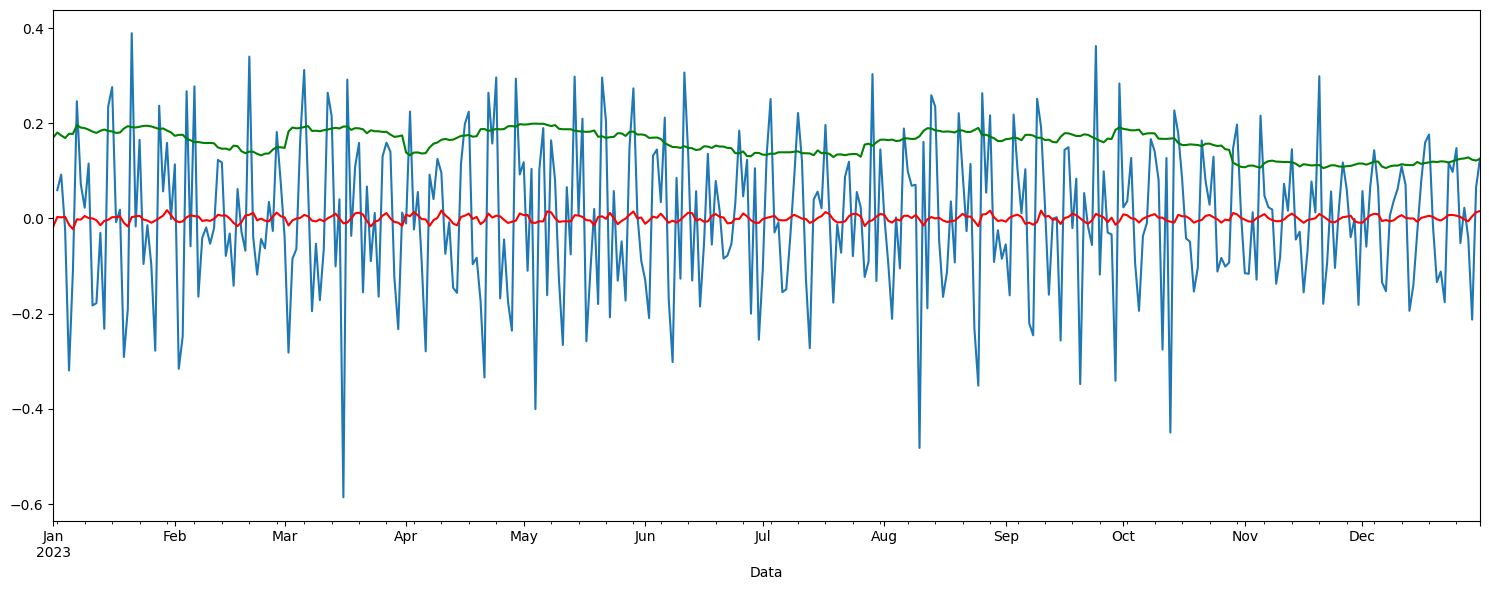

In [21]:
temporal_series_diff = temporal_series_sub.diff(1)
ma_diff = temporal_series_diff.rolling(window=30, min_periods=1, center=True).mean()

std_diff = temporal_series_diff.rolling(window=30, min_periods=1, center=True).std()

fig, ax = plt.subplots(figsize=(15, 6))
temporal_series_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color="red", legend=False)
std_diff.plot(ax=ax, color="green", legend=False)
plt.tight_layout()

X = temporal_series_diff.dropna().values

result_diff = adfuller(X)
print("Dickey-Fuller Aumentado")
print("ADF Statistic: %f" % result_diff[0])
print("p-value: %f" % result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print("\t%s: %.3f" % (key, value))

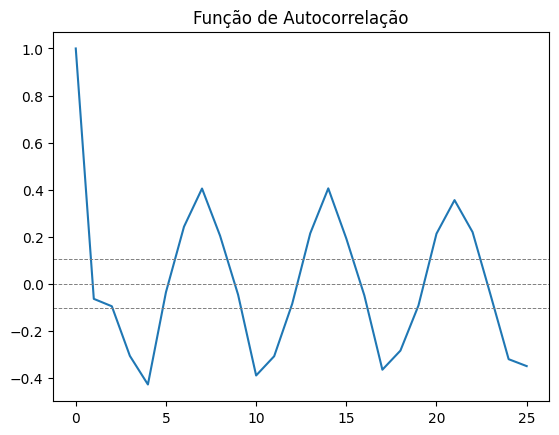

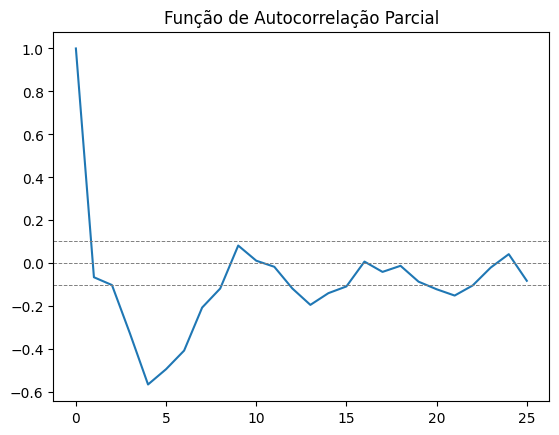

In [22]:
lag_acf = acf(temporal_series_diff.dropna(), nlags=25)
lag_pacf = pacf(temporal_series_diff.dropna(), nlags=25, method="ols")

plt.plot(lag_acf)

plt.axhline(
    y=-1.96 / (np.sqrt(len(temporal_series_diff.dropna() )-1)),
    linestyle="--",
    color="gray",
    linewidth=0.7
)

plt.axhline(y=0, linestyle="--", color="gray", linewidth=0.7)

plt.axhline(
    y=1.96 / (np.sqrt(len(temporal_series_diff.dropna())-1)),
    linestyle="--",
    color="gray",
    linewidth=0.7
)

plt.title("Função de Autocorrelação")

plt.show()

plt.plot(lag_pacf)

plt.axhline(
    y=-1.96 / (np.sqrt(len(temporal_series_diff.dropna() )-1)),
    linestyle="--",
    color="gray",
    linewidth=0.7
)

plt.axhline(y=0, linestyle="--", color="gray", linewidth=0.7)

plt.axhline(
    y=1.96 / (np.sqrt(len(temporal_series_diff.dropna())-1)),
    linestyle="--",
    color="gray",
    linewidth=0.7
)

plt.title("Função de Autocorrelação Parcial")

plt.show()

c:\Users\dionm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


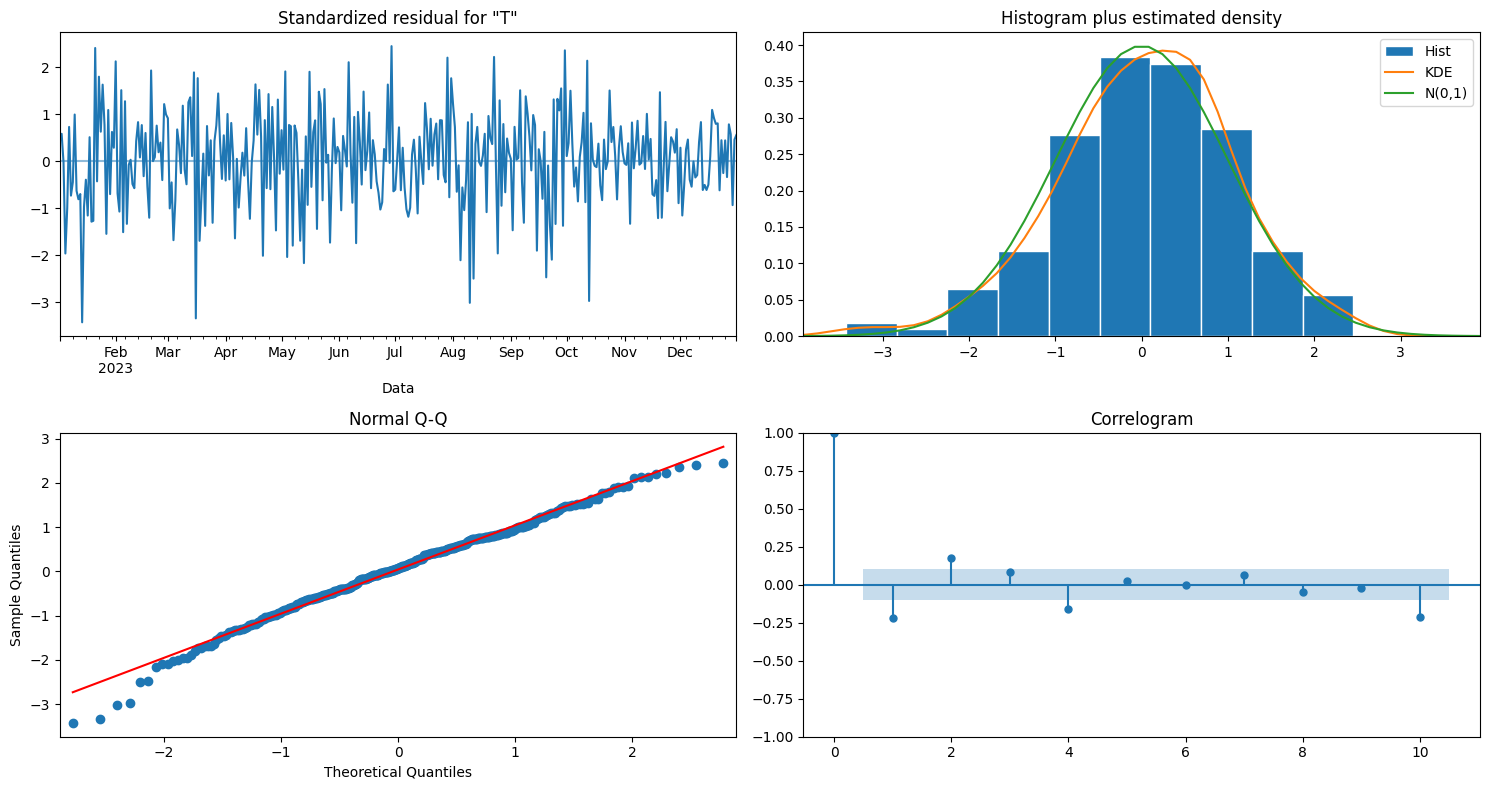

In [23]:
model_arima = sm.tsa.arima.ARIMA(temporal_series_log, order=(2, 1, 2))
results_arima = model_arima.fit()
results_arima.plot_diagnostics(figsize=(15, 8)).tight_layout()

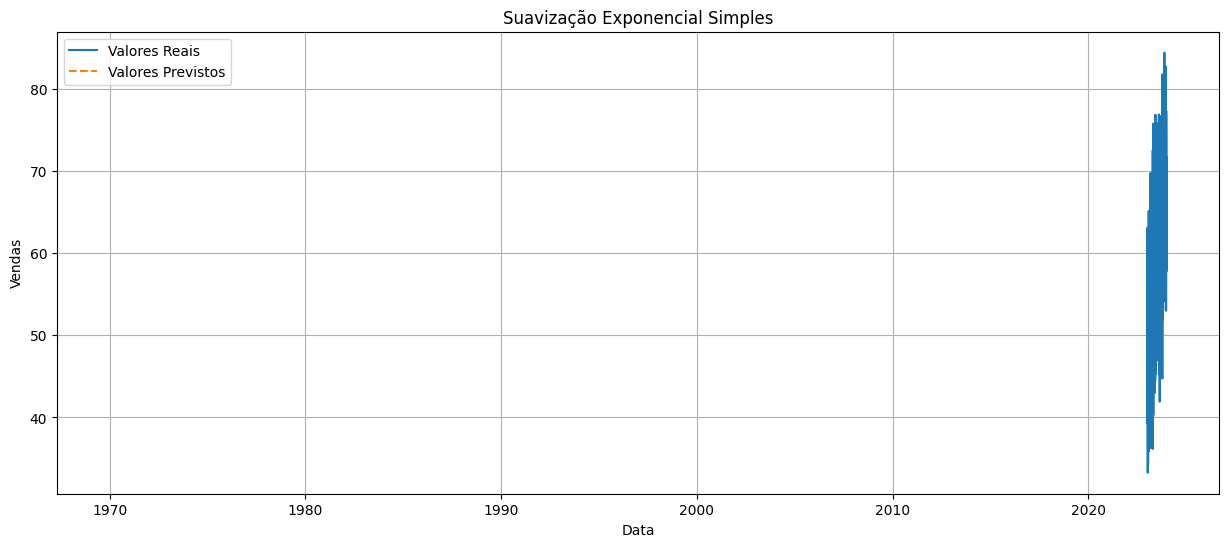

In [35]:
model = SimpleExpSmoothing(temporal_series)
adjusted_model = model.fit(smoothing_level=0.2)
exponential_smoothing = adjusted_model.fcastvalues

plt.figure(figsize=(15, 6))
plt.plot(temporal_series, label="Valores Reais")
plt.plot(exponential_smoothing, label="Valores Previstos", linestyle="--")
plt.title("Suavização Exponencial Simples")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.show()